# Statcast  Exploratory Data Analysis and Viz

### First, collect pitch-level data in 2019(from 03-28 to 07-27) from Statcast

In [18]:
from baseball_scraper import statcast

In [19]:
data = statcast(start_dt='2019-03-28', end_dt='2019-07-27')

This is a large query, it may take a moment to complete
Completed sub-query from 2019-03-28 to 2019-04-02
Completed sub-query from 2019-04-03 to 2019-04-08
Completed sub-query from 2019-04-09 to 2019-04-14
Completed sub-query from 2019-04-15 to 2019-04-20
Completed sub-query from 2019-04-21 to 2019-04-26
Completed sub-query from 2019-04-27 to 2019-05-02
Completed sub-query from 2019-05-03 to 2019-05-08
Completed sub-query from 2019-05-09 to 2019-05-14
Completed sub-query from 2019-05-15 to 2019-05-20
Completed sub-query from 2019-05-21 to 2019-05-26
Completed sub-query from 2019-05-27 to 2019-06-01
Completed sub-query from 2019-06-02 to 2019-06-07
Completed sub-query from 2019-06-08 to 2019-06-13
Completed sub-query from 2019-06-14 to 2019-06-19
Completed sub-query from 2019-06-20 to 2019-06-25
Completed sub-query from 2019-06-26 to 2019-07-01
Completed sub-query from 2019-07-02 to 2019-07-07
Completed sub-query from 2019-07-08 to 2019-07-13
Completed sub-query from 2019-07-14 to 2019-

In [20]:
data.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,124,FF,2019-07-26,97.9,2.9425,5.3351,Josh Hader,595879.0,623352.0,strikeout,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,Infield shift,Standard
1,133,FF,2019-07-26,95.8,3.0121,5.1484,Josh Hader,595879.0,623352.0,NaN,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,Infield shift,Standard
2,139,FF,2019-07-26,96.4,3.0275,5.2152,Josh Hader,595879.0,623352.0,NaN,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,Infield shift,Standard
3,149,FF,2019-07-26,95.8,2.8363,5.2773,Josh Hader,595879.0,623352.0,NaN,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,Standard,Standard
4,157,SL,2019-07-26,84.0,3.3324,5.0480,Josh Hader,519203.0,623352.0,field_out,...,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,Strategic,Standard


### Data import and munging

In [1]:
import pandas as pd

#df = pd.DataFrame(data)
#df.to_csv("MLB_2019.csv",index=False)

In [2]:
df = pd.read_csv("MLB_2019.csv")

In [3]:
df['month'] = pd.DatetimeIndex(df['game_date']).month
df['dayofgame'] = pd.DatetimeIndex(df['game_date']).day

In [4]:
df.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,month,dayofgame
0,124,FF,2019-07-26,97.9,2.9425,5.3351,Josh Hader,595879.0,623352.0,strikeout,...,2.0,3.0,2.0,3.0,2.0,3.0,Infield shift,Standard,7,26
1,133,FF,2019-07-26,95.8,3.0121,5.1484,Josh Hader,595879.0,623352.0,NaN,...,2.0,3.0,2.0,3.0,2.0,3.0,Infield shift,Standard,7,26
2,139,FF,2019-07-26,96.4,3.0275,5.2152,Josh Hader,595879.0,623352.0,NaN,...,2.0,3.0,2.0,3.0,2.0,3.0,Infield shift,Standard,7,26
3,149,FF,2019-07-26,95.8,2.8363,5.2773,Josh Hader,595879.0,623352.0,NaN,...,2.0,3.0,2.0,3.0,2.0,3.0,Standard,Standard,7,26
4,157,SL,2019-07-26,84.0,3.3324,5.0480,Josh Hader,519203.0,623352.0,field_out,...,2.0,3.0,2.0,3.0,2.0,3.0,Strategic,Standard,7,26


In [5]:
look_df=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466731 entries, 0 to 466730
Data columns (total 92 columns):
index                              466731 non-null int64
pitch_type                         464498 non-null object
game_date                          466731 non-null object
release_speed                      463868 non-null float64
release_pos_x                      463852 non-null float64
release_pos_z                      463852 non-null float64
player_name                        466731 non-null object
batter                             466731 non-null float64
pitcher                            466731 non-null float64
events                             118860 non-null object
description                        466731 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                           

### Data code book 

pitch_type
:The type of pitch derived from Statcast.

game_date
:Date of the Game.

release_speed
:Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand.

release_pos_x
:Horizontal Release Position of the ball measured in feet from the catcher's perspective.

release_pos_z
:Vertical Release Position of the ball measured in feet from the catcher's perspective.

player_name
:Player's name tied to the event of the search.

batter
:MLB Player Id tied to the play event.

pitcher
:MLB Player Id tied to the play event.

events
:Event of the resulting Plate Appearance.

description
:Description of the resulting pitch.

spin_dir
* Deprecated field from the old tracking system.

spin_rate_deprecated
* Deprecated field from the old tracking system. Replaced by release_spin

break_angle_deprecated
* Deprecated field from the old tracking system.

break_length_deprecated
* Deprecated field from the old tracking system.

zone
:Zone location of the ball when it crosses the plate from the catcher's perspective.


des
:Plate appearance description from game day.

game_type
:Type of Game. E = Exhibition, S = Spring Training, R = Regular Season, F = Wild Card, D = Divisional Series, L = League Championship Series, W = World Series

stand
:Side of the plate batter is standing.

p_throws
:Hand pitcher throws with.

home_team
:Abbreviation of home team.

away_team
:Abbreviation of away team.

type
:Short hand of pitch result. B = ball, S = strike, X = in play.

hit_location
Position of first fielder to touch the ball.

bb_type
:Batted ball type, ground_ball, line_drive, fly_ball, popup.

balls
:Pre-pitch number of balls in count.

strikes
:Pre-pitch number of strikes in count.

game_year
:Year game took place.

pfx_x
:Horizontal movement in feet from the catcher's perspective.

pfx_z
:Vertical movement in feet from the catcher's perpsective.

plate_x
:Horizontal position of the ball when it crosses home plate from the catcher's perspective.

plate_z
:Vertical position of the ball when it crosses home plate from the catcher's perspective.

on_3b
:Pre-pitch MLB Player Id of Runner on 3B.

on_2b
:Pre-pitch MLB Player Id of Runner on 2B.

on_1b
:Pre-pitch MLB Player Id of Runner on 1B.

outs_when_up
:Pre-pitch number of outs.

inning
:Pre-pitch inning number.

inning_topbot
:Pre-pitch top or bottom of inning.

hc_x
:Hit coordinate X of batted ball.

hc_y
:Hit coordinate Y of batted ball.

tfs_deprecated
* Deprecated field from old tracking system.

tfs_zulu_deprecated
* Deprecated field from old tracking system.

fielder_2
:Pre-pitch MLB Player Id of Catcher.

umpire
* Deprecated field from old tracking system.

sv_id
:Non-unique Id of play event per game.

vx0
:The velocity of the pitch, in feet per second, in x-dimension, determined at y=50 feet.

vy0
:The velocity of the pitch, in feet per second, in y-dimension, determined at y=50 feet.

vy0
:The velocity of the pitch, in feet per second, in z-dimension, determined at y=50 feet.

ax
:The acceleration of the pitch, in feet per second per second, in x-dimension, determined at y=50 feet.

ay
:The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.

az
:The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.

sz_top
:Top of the batter's strike zone set by the operator when the ball is halfway to the plate.

sz_bot
:Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate.

hit_distance
:Projected hit distance of the batted ball.

launch_speed
:Exit velocity of the batted ball as tracked by Statcast. For the limited subset of batted balls not tracked directly, estimates are included based on the process described here.

launch_angle
:Launch angle of the batted ball as tracked by Statcast. For the limited subset of batted balls not tracked directly, estimates are included based on the process described here.

effective_speed
Derived speed based on the the extension of the pitcher's release.

release_spin
:Spin rate of pitch tracked by Statcast.

release_extension
:Release extension of pitch in feet as tracked by Statcast.

game_pk
:Unique Id for Game.

pitcher
:MLB Player Id tied to the play event.

fielder_2
:MLB Player Id for catcher.

fielder_3
:MLB Player Id for 1B.

fielder_4
:MLB Player Id for 2B.

fielder_5
:MLB Player Id for 3B.

fielder_6
:MLB Player Id for SS.

fielder_7
:MLB Player Id for LF.

fielder_8
:MLB Player Id for CF.

fielder_9
:MLB Player Id for RF.

release_pos_y
:Release position of pitch measured in feet from the catcher's perspective.

estimated_ba_using_speedangle
:Estimated Batting Avg based on launch angle and exit velocity.

estimated_woba_using_speedangle
:Estimated wOBA based on launch angle and exit velocity.

woba_value
:wOBA value based on result of play.

woba_denom
:wOBA denominator based on result of play.

babip_value
:BABIP value based on result of play.

iso_value
:ISO value based on result of play.

launch_speed_angle
:Launch speed/angle zone based on launch angle and exit velocity.
1: Weak
2: Topped
3: Under
4: Flare/Burner
5: Solid Contact
6: Barrel 


at_bat_number
:Plate appearance number of the game.

pitch_number
:Total pitch number of the plate appearance.

pitch_name
:The name of the pitch derived from the Statcast Data.

home_score
:Pre-pitch home score

away_score
:Pre-pitch away score

bat_score
:Pre-pitch bat team score

fld_score
:Pre-pitch field team score

post_home_score
:Post-pitch home score

post_away_score
:Post-pitch away score

post_bat_score
:Post-pitch bat team score

if_fielding_alignment
:Infield fielding alignment at the time of the pitch.

of_fielding_alignment
:Outfield fielding alignment at the time of the pitch.

### Data exploration

In [6]:
df.groupby(['player_name','pitch_type']).pitch_number.sum().sort_values()

player_name          pitch_type
Matt Magill          CH               1.0
Roman Quinn          CH               1.0
Jose Osuna           CH               1.0
Enyel De Los Santos  FT               1.0
Sal Romano           CU               1.0
David McKay          SL               1.0
                     FF               1.0
Wily Peralta         CU               1.0
Richard Lovelady     CH               1.0
Kyle Crick           CH               1.0
Tony Barnette        CU               1.0
David Carpenter      SL               1.0
Geoff Hartlieb       FT               1.0
Andrew Heaney        FT               1.0
Mike Wright          FT               1.0
Mike Shawaryn        CH               1.0
Michel Baez          CU               1.0
Hector Neris         SL               1.0
Mark Reynolds        CU               1.0
Matt Grace           CU               1.0
Shane Bieber         FT               1.0
Ehire Adrianza       CH               1.0
Cody Anderson        FC               2.0
Ry

### Let's look at Hyun-Jin Ryu

In [7]:
Ryu_pitches = (df.loc[df.player_name=='Hyun-Jin Ryu', 
                                     ['pitch_type', 'month', 'dayofgame', 'pitch_number']]
                      .sort_values(by='pitch_number'))
Ryu_pitches.head()

,pitch_type,month,dayofgame,pitch_number
466156,FF,3,28,1.0
289356,CH,5,12,1.0
289351,FC,5,12,1.0
289346,FC,5,12,1.0
103124,FF,6,28,1.0


In [8]:
Ryu_pitches[Ryu_pitches.pitch_type=='CH'].pitch_number.sum()

1634.0

In [9]:
Ryu_month_sum = Ryu_pitches.groupby(['pitch_type', 'month']).pitch_number.sum().reset_index()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/kaysuh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


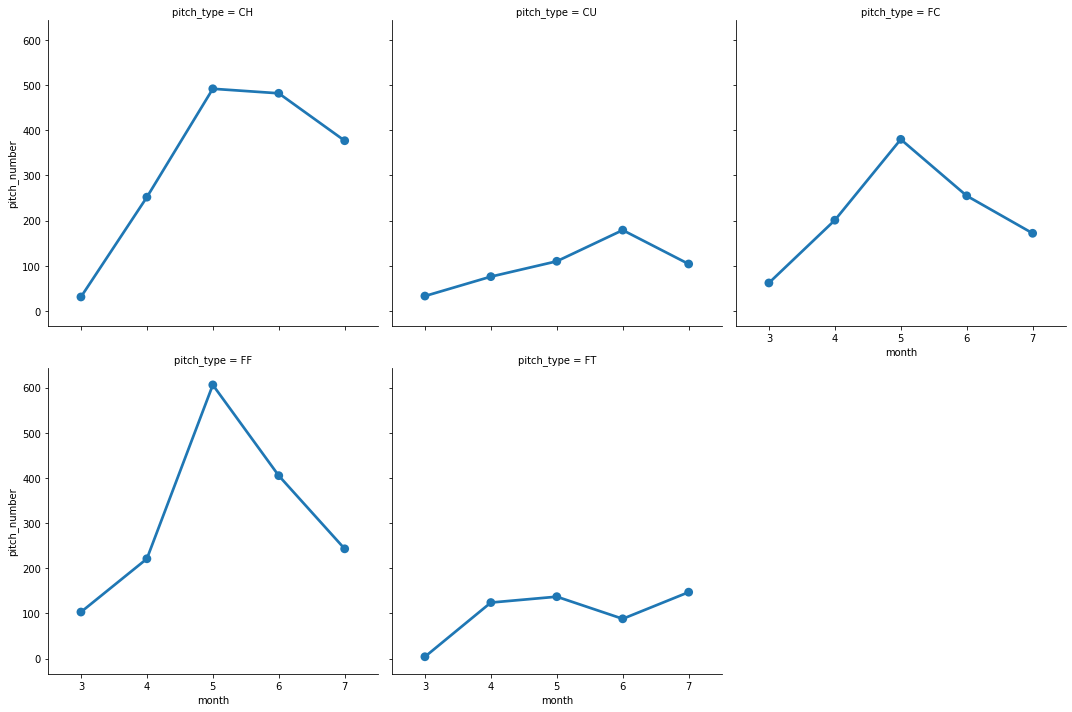

In [11]:
g = sns.factorplot(data=Ryu_month_sum, col="pitch_type", x="month", y="pitch_number",
                  col_wrap=3);

In [12]:
Ryu_game_sum = (Ryu_pitches.groupby(['pitch_type', 'dayofgame']).pitch_number
                       .sum().reset_index())

/home/kaysuh/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


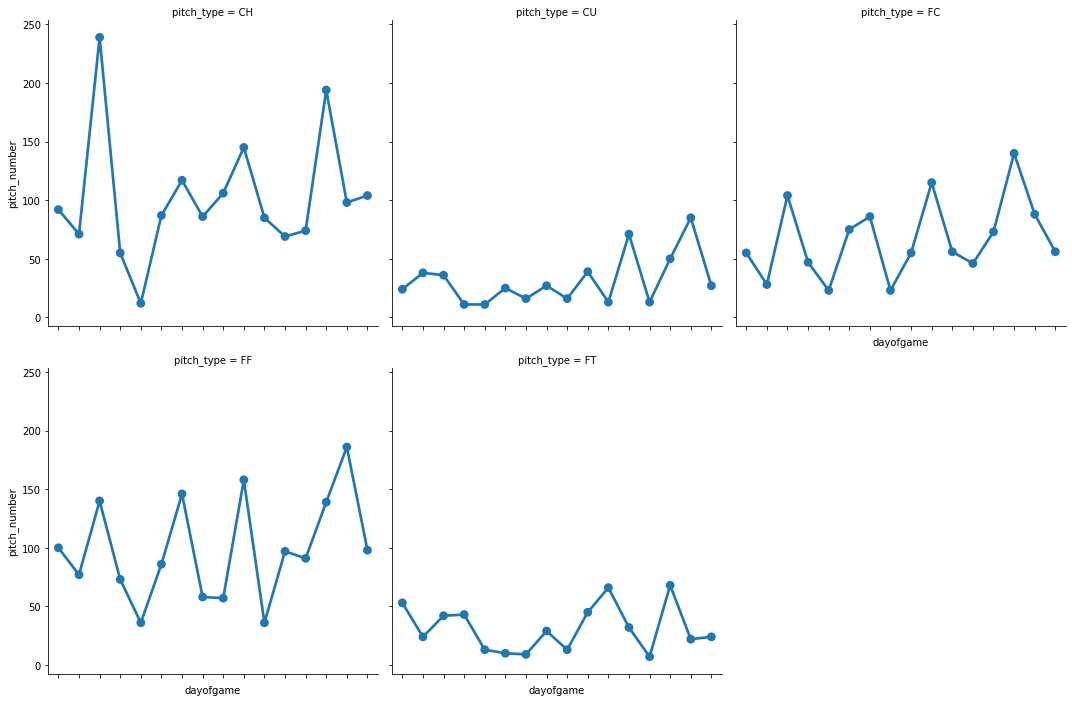

In [13]:
g = sns.factorplot(data=Ryu_game_sum, col="pitch_type", x="dayofgame", y="pitch_number",
                  col_wrap=3)
g.set_xticklabels(rotation=90);

In [14]:
df.groupby(['player_name','pitch_type']).pitch_number.sum().sort_values()

player_name          pitch_type
Matt Magill          CH               1.0
Roman Quinn          CH               1.0
Jose Osuna           CH               1.0
Enyel De Los Santos  FT               1.0
Sal Romano           CU               1.0
David McKay          SL               1.0
                     FF               1.0
Wily Peralta         CU               1.0
Richard Lovelady     CH               1.0
Kyle Crick           CH               1.0
Tony Barnette        CU               1.0
David Carpenter      SL               1.0
Geoff Hartlieb       FT               1.0
Andrew Heaney        FT               1.0
Mike Wright          FT               1.0
Mike Shawaryn        CH               1.0
Michel Baez          CU               1.0
Hector Neris         SL               1.0
Mark Reynolds        CU               1.0
Matt Grace           CU               1.0
Shane Bieber         FT               1.0
Ehire Adrianza       CH               1.0
Cody Anderson        FC               2.0
Ry

## Hyun-Jin Ryu vs. Max Scherzer, NL cy young race contenders 2019

In [15]:
is_ryu = df[df['player_name']=='Hyun-Jin Ryu']


In [19]:
ryu_plot = is_ryu['events'].value_counts()

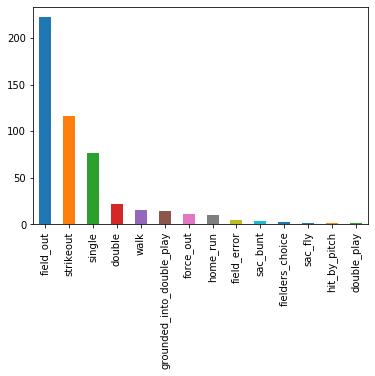

In [22]:
ryu_plot.plot.bar()

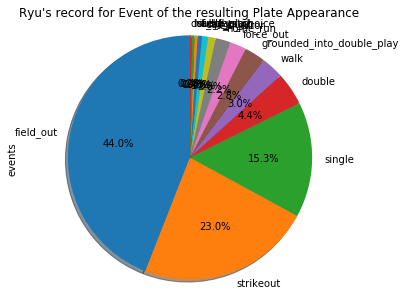

In [23]:
ryu_plot.plot(kind='pie',
             figsize=(6, 5),
             autopct='%1.1f%%', # add in percentages
             startangle=90,     # start angle 90° (Africa)
             shadow=True,       # add shadow      
             )
 
plt.title("Ryu's record for Event of the resulting Plate Appearance")
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()

In [24]:
is_sherzer = df[df['player_name']=='Max Scherzer']

In [25]:
is_sherzer.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,month,dayofgame
5911,1785,CU,2019-07-25,77.5,-3.4114,5.4250,Max Scherzer,621311.0,453286.0,caught_stealing_2b,...,3.0,0.0,3.0,0.0,3.0,0.0,Standard,Standard,7,25
5912,1796,SL,2019-07-25,85.0,-3.6777,4.9623,Max Scherzer,596115.0,453286.0,field_out,...,3.0,0.0,3.0,0.0,3.0,0.0,Standard,Standard,7,25
5913,1798,FF,2019-07-25,95.4,-3.5667,4.9891,Max Scherzer,596115.0,453286.0,NaN,...,3.0,0.0,3.0,0.0,3.0,0.0,Standard,Standard,7,25
5914,1811,SL,2019-07-25,86.0,-3.6349,4.9646,Max Scherzer,596115.0,453286.0,NaN,...,3.0,0.0,3.0,0.0,3.0,0.0,Standard,Standard,7,25
5915,1823,SL,2019-07-25,84.5,-3.7545,4.8674,Max Scherzer,596115.0,453286.0,NaN,...,3.0,0.0,3.0,0.0,3.0,0.0,Standard,Standard,7,25


In [26]:
sherzer_plot = is_sherzer['events'].value_counts()

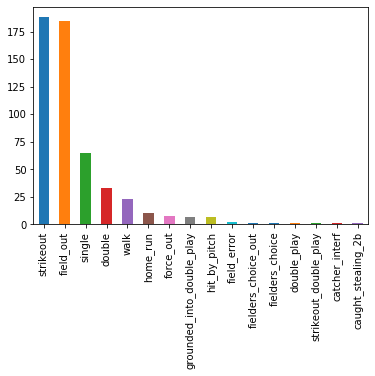

In [27]:
sherzer_plot.plot.bar()

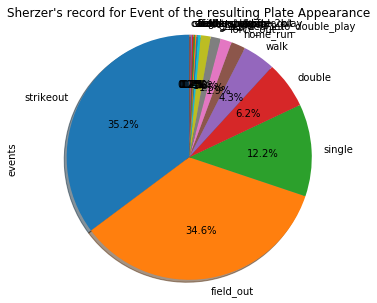

In [28]:
sherzer_plot.plot(kind='pie',
             figsize=(6, 5),
             autopct='%1.1f%%', # add in percentages
             startangle=90,     # start angle 90° (Africa)
             shadow=True,       # add shadow      
             )
 
plt.title("Sherzer's record for Event of the resulting Plate Appearance")
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()

In [ ]:
ryu_plot.plot.bar()

In [71]:
print("Hyun-jin Ryu pitched ball event totals, 2019:")
print(is_ryu['events'].value_counts())



print("\nMax sherzer pitched event totals, 2019:")
print(is_sherzer['events'].value_counts())

Hyun-jin Ryu pitched ball event totals, 2019:
field_out                    222
strikeout                    116
single                        77
double                        22
walk                          15
grounded_into_double_play     14
force_out                     11
home_run                      10
field_error                    5
sac_bunt                       4
fielders_choice                3
hit_by_pitch                   2
sac_fly                        2
double_play                    1
Name: events, dtype: int64

Max sherzer pitched event totals, 2019:
strikeout                    188
field_out                    185
single                        65
double                        33
walk                          23
home_run                      10
force_out                      8
hit_by_pitch                   7
grounded_into_double_play      7
field_error                    2
double_play                    1
catcher_interf                 1
strikeout_double_play       

In [72]:
is_ryu['events'].value_counts()

field_out                    222
strikeout                    116
single                        77
double                        22
walk                          15
grounded_into_double_play     14
force_out                     11
home_run                      10
field_error                    5
sac_bunt                       4
fielders_choice                3
hit_by_pitch                   2
sac_fly                        2
double_play                    1
Name: events, dtype: int64

In [73]:
is_sherzer['events'].value_counts()

strikeout                    188
field_out                    185
single                        65
double                        33
walk                          23
home_run                      10
force_out                      8
hit_by_pitch                   7
grounded_into_double_play      7
field_error                    2
double_play                    1
catcher_interf                 1
strikeout_double_play          1
fielders_choice_out            1
caught_stealing_2b             1
fielders_choice                1
Name: events, dtype: int64

In [74]:
is_ryu['pitch_type'].value_counts()

FF    547
CH    518
FC    356
FT    234
CU    220
Name: pitch_type, dtype: int64

In [75]:
is_sherzer['pitch_type'].value_counts()

FF    1024
SL     453
CH     296
CU     173
FC     167
Name: pitch_type, dtype: int64

In [76]:
is_ryu['effective_speed'].value_counts()

91.655    3
81.675    3
82.019    2
89.229    2
90.655    2
89.895    2
92.264    2
92.324    2
91.013    2
90.549    2
79.193    2
91.339    2
90.762    2
91.561    2
80.789    2
91.818    2
91.363    2
89.362    2
91.221    2
86.800    2
91.800    2
88.629    2
90.111    2
90.559    2
88.335    2
92.811    2
92.892    2
89.907    2
90.293    2
92.653    2
         ..
91.109    1
79.808    1
91.058    1
79.842    1
91.513    1
89.643    1
88.769    1
90.870    1
81.363    1
92.052    1
80.319    1
81.550    1
71.950    1
88.050    1
90.050    1
68.915    1
83.101    1
88.128    1
92.587    1
72.389    1
91.311    1
87.219    1
82.464    1
91.558    1
90.535    1
89.459    1
71.867    1
79.689    1
88.267    1
80.500    1
Name: effective_speed, Length: 1764, dtype: int64

In [77]:
is_sherzer['effective_speed'].value_counts()

94.729    5
94.696    4
95.395    4
94.606    3
93.095    3
83.802    3
83.506    3
93.775    2
95.994    2
95.947    2
94.556    2
94.275    2
94.704    2
93.588    2
95.717    2
93.147    2
95.327    2
84.456    2
93.980    2
82.738    2
93.368    2
95.831    2
85.479    2
94.732    2
94.370    2
94.006    2
92.387    2
84.205    2
82.606    2
94.116    2
         ..
84.396    1
85.309    1
84.533    1
77.865    1
85.680    1
89.345    1
85.242    1
95.090    1
94.462    1
78.329    1
94.671    1
85.529    1
89.895    1
95.318    1
79.682    1
94.038    1
94.009    1
77.999    1
91.771    1
92.362    1
75.759    1
93.241    1
92.575    1
85.193    1
95.644    1
93.635    1
95.264    1
95.970    1
86.122    1
93.500    1
Name: effective_speed, Length: 1964, dtype: int64

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Analyzing field_out with Statcast data

/home/kaysuh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/kaysuh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/kaysuh/anaconda3/lib/python3

Text(0.5, 1.0, 'Max Sherzer\nField out, 2019')

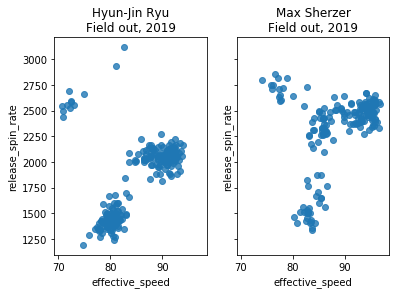

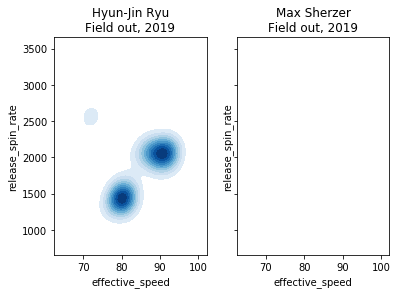

In [79]:
# Filter to include home runs only
ryu_field_out = is_ryu[is_ryu['events'] == 'field_out']
sherzer_field_out = is_sherzer[is_sherzer['events'] == 'field_out']

# Create a figure with two scatter plots 
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='effective_speed', y='release_spin_rate', fit_reg=False, color='tab:blue', data=ryu_field_out, ax=axs1[0]).set_title('Hyun-Jin Ryu\nField out, 2019')
sns.regplot(x='effective_speed', y='release_spin_rate', fit_reg=False, color='tab:blue', data=sherzer_field_out, ax=axs1[1]).set_title('Max Sherzer\nField out, 2019')

# Create a figure with two KDE plots 
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(ryu_field_out['effective_speed'], ryu_field_out['release_spin_rate'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Hyun-Jin Ryu\nField out, 2019')
sns.kdeplot(sherzer_field_out['effective_speed'], sherzer_field_out['release_spin_rate'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Max Sherzer\nField out, 2019')

### Field_out by pitch's release_speed

Text(0.5, 1.0, 'Home Runs, 2015-2017')

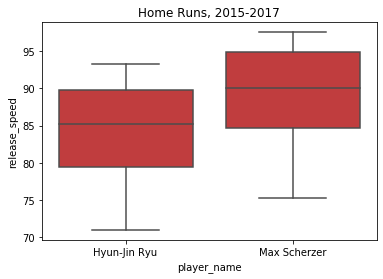

In [80]:
# Combine the Ryu and max field_out DataFrames for easy boxplot plotting
ryu_sherzer_field_out = pd.concat([ryu_field_out, sherzer_field_out])

# Create a boxplot that describes the pitch release_speed of each player's field_out
sns.boxplot(y='release_speed', x='player_name', data=ryu_sherzer_field_out, color='tab:red').set_title('Home Runs, 2015-2017')

### Field_out by pitch location (I)

In [81]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [82]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

### Hyunjin Ryu's field_out zone

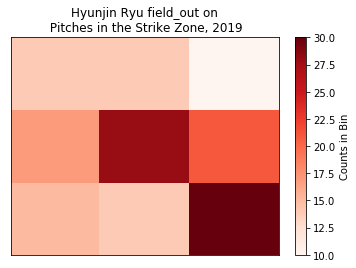

In [83]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
ryu_strike_field_out = ryu_field_out.copy().loc[ryu_field_out.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for ryu's field_out
ryu_strike_field_out['zone_x'] = ryu_strike_field_out.apply(assign_x_coord, axis=1)
ryu_strike_field_out['zone_y'] = ryu_strike_field_out.apply(assign_y_coord, axis=1)

# Plot Ryu's field_out zone as a 2D histogram with a colorbar
plt.hist2d(ryu_strike_field_out['zone_x'],ryu_strike_field_out['zone_y'], bins=3, cmap='Reds')
plt.title('Hyunjin Ryu field_out on\n Pitches in the Strike Zone, 2019')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

### Max Sherzer's field_out  zone

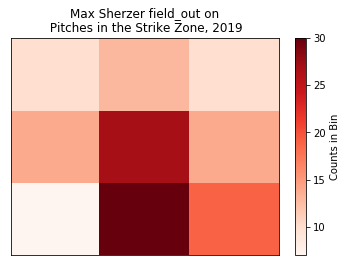

In [84]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
sherzer_strike_field_out = sherzer_field_out.copy().loc[sherzer_field_out.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for sherzer's field_out zone
sherzer_strike_field_out['zone_x'] = sherzer_strike_field_out.apply(assign_x_coord, axis=1)
sherzer_strike_field_out['zone_y'] = sherzer_strike_field_out.apply(assign_y_coord, axis=1)

# Plot sherzer's field_out zone as a 2D histogram with a colorbar
plt.hist2d(sherzer_strike_field_out['zone_x'],sherzer_strike_field_out['zone_y'], bins=3, cmap='Reds')
plt.title('Max Sherzer field_out on\n Pitches in the Strike Zone, 2019')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')